In [1]:
import numpy as np
import pickle
import nltk
from sklearn.model_selection import KFold

In [2]:
raw_train = []
with open('ATIS_train.iob','r') as f:
    for line in f:
        raw_train.append(line)
        
raw_test = []
with open('ATIS_test.iob','r') as f:
    for line in f:
        raw_test.append(line)

In [3]:
np.shape(raw_test)

(893,)

In [4]:
combine=raw_train+raw_test

# Preprocessing

In [5]:
train = []
replace_dic = {'\'d' : "would" , '\'s' : "is" , '\'t' : "not"}
for sentence in raw_train:
    sentence = sentence.split('\t')[0][4:-4]
    words = sentence.split(' ')
    new_sentence = ""
    for i in range(len(words)):
        word = words[i]
        word = word.split("'")[0]
        if(word == ''):
            print word
            continue;
        if(word in replace_dic):
            print(word)
            word = replace_dic[word];
        if(word.isdigit()):
            word = "number"
        new_sentence = new_sentence + " " + word
    train.append(new_sentence[1:])

In [6]:
np.shape(raw)

NameError: name 'raw' is not defined

In [7]:
test = []
replace_dic = {'\'d' : "would" , '\'s' : "is" , '\'t' : "not"}
for sentence in raw_test:
    sentence = sentence.split('\t')[0][4:-4]
    words = sentence.split(' ')
    new_sentence = ""
    for i in range(len(words)):
        word = words[i]
        word = word.split("'")[0]
        if(word == ''):
            continue;
        if(word in replace_dic):
            word = replace_dic[word];
        if(word.isdigit()):
            word = "number"
        new_sentence = new_sentence + " " + word
    test.append(new_sentence[1:])

In [8]:
with open('/home/sinchan/Videos/slot_filling/train_data.pickle', 'w+') as fp:
     pickle.dump(train,fp)
fp.close()

with open('/home/sinchan/Videos/slot_filling/test_data.pickle', 'w+') as fp:
     pickle.dump(test,fp)
fp.close()

In [9]:
with open('/home/sinchan/Videos/slot_filling/train_data.pickle', 'r+') as fp:
    train = pickle.load(fp)
fp.close()

with open('/home/sinchan/Videos/slot_filling/test_data.pickle', 'r+') as fp:
    test = pickle.load(fp)
fp.close()

In [10]:
test[0]

'i would like to find a flight from charlotte to las vegas that makes a stop in st. louis'

In [11]:
#forK-fold
combine=test+train

In [12]:
len(combine)

5871

In [13]:
raw_test[0]

'BOS i would like to find a flight from charlotte to las vegas that makes a stop in st. louis EOS\tO O O O O O O O O B-fromloc.city_name O B-toloc.city_name I-toloc.city_name O O O O O B-stoploc.city_name I-stoploc.city_name atis_flight\n'

In [14]:
raw = raw_train + raw_test

# Dictionary Generation

In [15]:
def check(word):
    replace_dic = {'\'d' : "would" , '\'s' : "is" , '\'t' : "not"}
    word = word.split("'")[0]
    if(word == ''):
        return word
    if(word in replace_dic):
        word = replace_dic[word];
    if(word.isdigit()):
        word = "number"
    return word

In [16]:
slot_dict = dict()
word_dict = dict()

i_s = 0
i_w = 1
a=[[]]
ii=0;
for utterance in raw:
    j=1
    ii=ii+1
    t = utterance.split('\t')
    words = t[0].strip().split(' ')
    slots = t[1].strip().split(' ')
    n = len(words)
    for i in xrange(n):
        word = check(words[i])
        if(word not in word_dict):
            word_dict[word] = i_w
            i_w = i_w + 1
    for i in xrange(n-1):
        if(slots[i] not in slot_dict):
            slot_dict[slots[i]] = i_s
            i_s = i_s + 1
        j=j+1

In [17]:
np.shape(slot_dict)

()

In [18]:
dicts = [slot_dict,word_dict]

In [19]:
with open('/home/sinchan/Videos/slot_filling/slot_word_dict.pickle', 'w+') as fp:
    pickle.dump(dicts,fp)
fp.close()

In [20]:
with open('/home/sinchan/Videos/slot_filling/slot_word_dict.pickle', 'r+') as fp:
    dicts = pickle.load(fp)
fp.close()

In [21]:
slot_dict,word_dict = dicts

In [22]:
len(slot_dict)

127

# Sequence Making

In [23]:
def make_sequences(data,word_dict):
    sequences = list()
    for sentence in data:
        sequence = list()
        words = sentence.split(' ')
        for word in words:
                sequence.append(word_dict[word])
        sequences.append(sequence)
    return sequences

In [24]:
combine=test+train

In [25]:
combine=np.array(combine)

In [26]:
train_sequence = make_sequences(train,word_dict)
test_sequence = make_sequences(test,word_dict)

In [27]:
np.shape(train)

(4978,)

In [28]:
with open('/home/sinchan/Videos/slot_filling/train_sequence.pickle', 'w+') as fp:
     pickle.dump(train_sequence,fp)
fp.close()

with open('/home/sinchan/Videos/slot_filling/test_sequence.pickle', 'w+') as fp:
     pickle.dump(test_sequence,fp)
fp.close()

In [29]:
with open('/home/sinchan/Videos/slot_filling/train_sequence.pickle', 'r+') as fp:
    train_sequence = pickle.load(fp)
fp.close()

with open('/home/sinchan/Videos/slot_filling/test_sequence.pickle', 'r+') as fp:
    test_sequence = pickle.load(fp)
fp.close()

In [32]:
sequences=train_sequence+test_sequence

In [33]:
m = 0
lens = list()
for sequence in sequences:
    lens.append(len(sequence))
    m = max(len(sequence),m)
    
print m

46


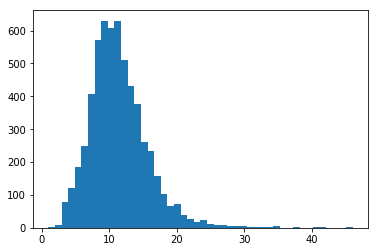

In [34]:
from matplotlib import pyplot
pyplot.hist(lens,46)
pyplot.show()

## Output in One-Hot form(Slot)

In [35]:
utterance = raw_train[0]
slots = utterance.split('\t')[1].strip().split(' ')[:-1]
slots = t
slots

['BOS find me a flight that flies from memphis to tacoma EOS',
 'O O O O O O O O B-fromloc.city_name O B-toloc.city_name atis_flight\n']

In [36]:
n = len(slot_dict)

y_train_slot = list()
for utterance in raw_train:
    outs = list()
    slots = utterance.split('\t')[1].strip().split(' ')[:-1]
    for slot in slots:
        out = np.zeros(n)
        out = list(out)
        out[slot_dict[slot]] = 1
        outs.append(out) 
    y_train_slot.append(outs)
    
y_test_slot = list()
for utterance in raw_test:
    outs = list()
    slots = utterance.split('\t')[1].strip().split(' ')[:-1]
    for slot in slots:
        out = np.zeros(n)
        out = list(out)
        out[slot_dict[slot]] = 1
        outs.append(out) 
    y_test_slot.append(outs)

In [37]:
np.shape(y_train_slot)

(4978,)

In [38]:
len(y_val)

NameError: name 'y_val' is not defined

In [39]:
len(combine_slot)

NameError: name 'combine_slot' is not defined

### Make POS_dict

In [40]:
pos_dict = dict()
i = 0

for utterance in train + test:
    tags = nltk.pos_tag(utterance.split(' '))
    for tag in tags:
        tag = tag[1]
        if(tag not in pos_dict):
            pos_dict[tag] = i
            i += 1

In [41]:
pos_dict

{'CC': 5,
 'CD': 21,
 'DT': 6,
 'EX': 22,
 'FW': 28,
 'IN': 4,
 'JJ': 9,
 'JJR': 26,
 'JJS': 12,
 'MD': 15,
 'NN': 0,
 'NNP': 25,
 'NNS': 8,
 'PDT': 20,
 'PRP': 14,
 'PRP$': 27,
 'RB': 17,
 'RBR': 29,
 'RBS': 19,
 'RP': 24,
 'TO': 2,
 'UH': 30,
 'VB': 3,
 'VBD': 23,
 'VBG': 11,
 'VBN': 13,
 'VBP': 1,
 'VBZ': 10,
 'WDT': 16,
 'WP': 7,
 'WRB': 18}

In [42]:
n = len(pos_dict)
max_len = 46

x_train_pos = list()
for utterance in train:
    outs = np.zeros((max_len,len(pos_dict)))
#     outs = list(outs)
    tags = nltk.pos_tag(utterance.split(' '))
    for i in range(len(tags)):
        outs[i][pos_dict[tags[i][1]]] = 1
    x_train_pos.append(outs)
    
x_test_pos = list()
for utterance in test:
    outs = np.zeros((max_len,len(pos_dict)))
#     outs = list(outs)
    tags = nltk.pos_tag(utterance.split(' '))
    for i in range(len(tags)):
        outs[i][pos_dict[tags[i][1]]] = 1
    x_test_pos.append(outs)

In [44]:
np.shape(x_train_pos)

(4978, 46, 31)

In [46]:
np.shape(y_train_slot)

(4978,)

In [47]:
x_train_pos[3][2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
def make_sequences(data,word_dict):
    sequences = list()
    for sentence in data:
        sequence = list()
        words = sentence.split(' ')
        for word in words:
                sequence.append(word_dict[word])
        sequences.append(sequence)
    return sequences

EXTRAS

In [49]:
import numpy as np
import os, pickle, sys, json, random, math 
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
# from keras.np_utils import probas_to_classes
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Conv1D,Conv2D, MaxPooling1D,MaxPooling2D, Embedding, LSTM, add, concatenate, TimeDistributed, Bidirectional,Reshape
from sklearn.metrics.pairwise import cosine_similarity
from keras.layers import Dense, Input, Flatten, Merge, Dropout, concatenate, Concatenate
from sklearn.metrics import accuracy_score, f1_score

/home/sinchan/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [50]:

with open('/home/sinchan/Videos/slot_filling/embedding_matrix_m.pickle', 'r+') as fp:
    embedding_matrix = pickle.load(fp)
fp.close()

with open('/home/sinchan/Videos/slot_filling/embedding_matrix_mw.pickle', 'r+') as fp:
    embedding_matrix_w = pickle.load(fp)
fp.close()
with open('/home/sinchan/Videos/slot_filling/embedding_matrix_mg.pickle', 'r+') as fp:
    embedding_matrix_g = pickle.load(fp)
fp.close()
with open('/home/sinchan/Videos/slot_filling/train_sequence.pickle', 'r+') as fp:
    train_sequence = pickle.load(fp)
fp.close()

with open('/home/sinchan/Videos/slot_filling/test_sequence.pickle', 'r+') as fp:
    test_sequence = pickle.load(fp)
fp.close()

with open('/home/sinchan/Videos/slot_filling/slot_word_dict.pickle', 'r+') as fp:
    slot_word_dict = pickle.load(fp)
fp.close()
train_sequence = pad_sequences(train_sequence, maxlen = 46, padding='post')
test_sequence = pad_sequences(test_sequence, maxlen = 46, padding='post') 

max_len = 46

In [51]:
np.shape(test_sequence)

(893, 46)

In [52]:
n = len(slot_dict)

y_train_slot = list()
for utterance in raw_train:
    outs = np.zeros((max_len,len(slot_dict)))
    outs = list(outs)
    slots = utterance.split('\t')[1].strip().split(' ')[1:-1]
    for i in range(len(slots)):
        outs[i][slot_dict[slots[i]]] = 1
    y_train_slot.append(outs)
    
y_test_slot = list()
for utterance in raw_test:
    outs = np.zeros((max_len,len(slot_dict)))
    outs = list(outs)
    slots = utterance.split('\t')[1].strip().split(' ')[1:-1]
    for i in range(len(slots)):
        outs[i][slot_dict[slots[i]]] = 1
    y_test_slot.append(outs)

In [54]:
np.shape(y_train_slot)

(4978, 46, 127)

In [55]:
n = len(slot_dict)

z_train_slot = list()
for utterance in raw_train:
    outs = list()
    slots = utterance.split('\t')[1].strip().split(' ')[1:-1]
    for i in range(len(slots)):
        outs.append(slot_dict[slots[i]])
    z_train_slot.append(outs)
    
z_test_slot = list()
for utterance in raw_test:
    outs = list()
    slots = utterance.split('\t')[1].strip().split(' ')[1:-1]
    for i in range(len(slots)):
        outs.append(slot_dict[slots[i]])
    z_test_slot.append(outs)

In [56]:
def flatten(mat):
    arr = list()
    for ar in mat:
        for a in ar:
            arr.append(a)
    return arr

In [57]:
def make_z_pred_slot(mat,z_act_slot):
    ans = list()
    for i in range(len(mat)):
        ans.append(mat[i][:len(z_act_slot[i])])
    return ans

In [58]:
def accu(list1, list2):
    if(len(list1) != len(list2)):
        print("Size of a the lists not equal")
        return
    count = 0.0
    for i in range(len(list1)):
        if(list1[i] == list2[i]):
            count = count + 1
            
    return count/len(list1)  

In [59]:
np.array(y_test_slot[0])

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
lstm_embedding_layer = Embedding(len(embedding_matrix_g), len(embedding_matrix_g[0]), weights=[embedding_matrix_g], input_length=127, 
                            trainable=False, mask_zero = True)

sequence_input = Input(shape=(max_len,), dtype='int32')

lstm_embedded_sequences = lstm_embedding_layer(sequence_input)

lstm = LSTM(200,return_sequences=True)(lstm_embedded_sequences)

out = Dense(units=200, activation='relu', kernel_initializer='he_normal')(lstm)

out = Dense(units=len(slot_dict), activation='softmax', kernel_initializer='he_normal')(out)

graph = Model(inputs=sequence_input, outputs=out)
graph.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','categorical_accuracy'])

ValueError: Dimensions must be equal, but are 127 and 46 for 'loss/dense_2_loss/mul_1' (op: 'Mul') with input shapes: [?,127], [?,46].

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# CNN+LSTM

In [241]:
model = Sequential()
model.add(Embedding(len(embedding_matrix), len(embedding_matrix[0]), weights=[embedding_matrix], input_length=46, trainable=False))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Reshape((23*2,16)))
model.add(LSTM(100, dropout=0.2, return_sequences=True))
model.add(LSTM(100, dropout=0.2, return_sequences=True))
model.add(Dense(300,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(len(slot_dict), activation="sigmoid",kernel_initializer='he_normal',input_shape=(46,)))
model.summary()
model.save('rnncnn')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, 46, 600)           460200    
_________________________________________________________________
conv1d_65 (Conv1D)           (None, 46, 32)            57632     
_________________________________________________________________
max_pooling1d_65 (MaxPooling (None, 23, 32)            0         
_________________________________________________________________
reshape_19 (Reshape)         (None, 46, 16)            0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 46, 100)           46800     
_________________________________________________________________
lstm_32 (LSTM)               (None, 46, 100)           80400     
_________________________________________________________________
dense_43 (Dense)             (None, 46, 300)           30300     
__________

In [242]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','categorical_accuracy'])

In [243]:
saveBestModel = ModelCheckpoint(filepath="/home/sinchan/Videos/slot_filling/g_lstm.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='auto')


In [244]:
model.fit(np.array(train_sequence), np.array(y_train_slot),validation_data=(np.array(test_sequence),np.array(y_test_slot)), epochs=10, batch_size=50, verbose=2,callbacks=[saveBestModel])

Train on 4978 samples, validate on 893 samples
Epoch 1/10
 - 37s - loss: 0.6277 - acc: 0.9004 - categorical_accuracy: 0.9004 - val_loss: 0.4013 - val_acc: 0.9108 - val_categorical_accuracy: 0.9108

Epoch 00001: val_acc improved from -inf to 0.91083, saving model to /home/sinchan/Videos/slot_filling/g_lstm.hdf5
Epoch 2/10
 - 24s - loss: 0.3250 - acc: 0.9103 - categorical_accuracy: 0.9103 - val_loss: 0.2825 - val_acc: 0.9108 - val_categorical_accuracy: 0.9108

Epoch 00002: val_acc did not improve from 0.91083
Epoch 3/10
 - 24s - loss: 0.2443 - acc: 0.8983 - categorical_accuracy: 0.8983 - val_loss: 0.2226 - val_acc: 0.7206 - val_categorical_accuracy: 0.7206

Epoch 00003: val_acc did not improve from 0.91083
Epoch 4/10
 - 24s - loss: 0.1787 - acc: 0.2476 - categorical_accuracy: 0.2476 - val_loss: 0.1403 - val_acc: 0.1935 - val_categorical_accuracy: 0.1935

Epoch 00004: val_acc did not improve from 0.91083
Epoch 5/10
 - 26s - loss: 0.1199 - acc: 0.2219 - categorical_accuracy: 0.2219 - val_l

In [245]:
lstm_pred_train = model.predict(train_sequence)
lstm_pred_test =  model.predict(test_sequence)
lstm_pred_classes_train = lstm_pred_train.argmax(axis=-1)
lstm_pred_classes_test = lstm_pred_test.argmax(axis=-1)

In [62]:
thefile = open('/home/sinchan/Videos/predSlotTest.txt', 'w')
thefile1= open('/home/sinchan/Videos/predSlotTrain.txt', 'w')

In [58]:
for item in lstm_pred_train:
  thefile.write("%s\n" % item)

In [246]:
z_pred_slot_train = make_z_pred_slot(lstm_pred_classes_train,z_train_slot)
z_pred_slot_test = make_z_pred_slot(lstm_pred_classes_test,z_test_slot)

In [63]:
for item in z_pred_slot_train:
  thefile.write("%s\n" % item)
for item in z_pred_slot_test:
  thefile1.write("%s\n" % item)

In [247]:
print ("Train F1: " + str(f1_score(flatten(z_train_slot),flatten(z_pred_slot_train), average = 'weighted')))
print ("Test F1: " + str(f1_score(flatten(z_test_slot),flatten(z_pred_slot_test), average = 'weighted')))

Train F1: 0.9456337726026143
Test F1: 0.920732482768037


# CNN

In [248]:
model2 = Sequential()
model2.add(Embedding(len(embedding_matrix), len(embedding_matrix[0]), weights=[embedding_matrix], input_length=46, trainable=False))
model2.add(Conv1D(filters=100, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Reshape((23*2,50)))
model2.add(Dense(300,activation='relu',kernel_initializer='he_normal'))
model2.add(Dense(len(slot_dict), activation="sigmoid",kernel_initializer='he_normal',input_shape=(46,)))

In [249]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 46, 600)           460200    
_________________________________________________________________
conv1d_66 (Conv1D)           (None, 46, 100)           180100    
_________________________________________________________________
max_pooling1d_66 (MaxPooling (None, 23, 100)           0         
_________________________________________________________________
reshape_20 (Reshape)         (None, 46, 50)            0         
_________________________________________________________________
dense_45 (Dense)             (None, 46, 300)           15300     
_________________________________________________________________
dense_46 (Dense)             (None, 46, 127)           38227     
Total params: 693,827
Trainable params: 233,627
Non-trainable params: 460,200
________________________________________________________________

In [250]:
saveBestModel = ModelCheckpoint(filepath="/home/sinchan/Videos/slot_filling/cnne_lstm.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='auto')


In [251]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','categorical_accuracy'])

In [252]:
model2.fit(np.array(train_sequence), np.array(y_train_slot),validation_data=(np.array(test_sequence),np.array(y_test_slot)), epochs=10, batch_size=50, verbose=2,callbacks=[saveBestModel])

Train on 4978 samples, validate on 893 samples
Epoch 1/10
 - 16s - loss: 0.3468 - acc: 0.9078 - categorical_accuracy: 0.9078 - val_loss: 0.1477 - val_acc: 0.9108 - val_categorical_accuracy: 0.9108

Epoch 00001: val_acc improved from -inf to 0.91083, saving model to /home/sinchan/Videos/slot_filling/cnne_lstm.hdf5
Epoch 2/10
 - 13s - loss: 0.1144 - acc: 0.9103 - categorical_accuracy: 0.9103 - val_loss: 0.1159 - val_acc: 0.9110 - val_categorical_accuracy: 0.9110

Epoch 00002: val_acc improved from 0.91083 to 0.91105, saving model to /home/sinchan/Videos/slot_filling/cnne_lstm.hdf5
Epoch 3/10
 - 13s - loss: 0.0907 - acc: 0.9164 - categorical_accuracy: 0.9164 - val_loss: 0.0628 - val_acc: 0.9634 - val_categorical_accuracy: 0.9634

Epoch 00003: val_acc improved from 0.91105 to 0.96344, saving model to /home/sinchan/Videos/slot_filling/cnne_lstm.hdf5
Epoch 4/10
 - 13s - loss: 0.0293 - acc: 0.9713 - categorical_accuracy: 0.9713 - val_loss: 0.0476 - val_acc: 0.9663 - val_categorical_accuracy: 

In [253]:
lstm_pred_train = model2.predict(train_sequence)
lstm_pred_test =  model2.predict(test_sequence)
lstm_pred_classes_train = lstm_pred_train.argmax(axis=-1)
lstm_pred_classes_test = lstm_pred_test.argmax(axis=-1)

In [254]:
z_pred_slot_train = make_z_pred_slot(lstm_pred_classes_train,z_train_slot)
z_pred_slot_test = make_z_pred_slot(lstm_pred_classes_test,z_test_slot)

In [255]:
print ("Train F1: " + str(f1_score(flatten(z_train_slot),flatten(z_pred_slot_train), average = 'weighted')))
print ("Test F1: " + str(f1_score(flatten(z_test_slot),flatten(z_pred_slot_test), average = 'weighted')))

Train F1: 0.9818047942394821
Test F1: 0.9453120280255638


In [256]:
print ("Train Accuracy: " + str(accu(flatten(z_train_slot),flatten(z_pred_slot_train))*100) + "%")
print ("Test Accuracy: " + str(accu(flatten(z_test_slot),flatten(z_pred_slot_test))*100) + "%")

Train Accuracy: 98.4021352313%
Test Accuracy: 95.2422522916%


# 3CNN+LSTM

In [65]:
embedding_layer = Embedding(len(embedding_matrix_w), len(embedding_matrix_w[0]), weights=[embedding_matrix_w], input_length=max_len, trainable=False)

sequence_input = Input(shape=(max_len,), dtype='int32')

embedded_sequences = embedding_layer(sequence_input)

conv0 = Conv1D(filters=100, kernel_size=3, activation='relu', padding='same',kernel_initializer='he_normal')(embedded_sequences)
pool0 = MaxPooling1D(2)(conv0)
#flatten0 = Flatten()(pool0)

conv1 = Conv1D(filters=100, kernel_size=3, activation='relu', padding='same',kernel_initializer='he_normal')(embedded_sequences)
pool1 = MaxPooling1D(2)(conv1)
#flatten1 = Flatten()(pool1)

conv2 = Conv1D(filters=100, kernel_size=3, activation='relu', padding='same',kernel_initializer='he_normal')(embedded_sequences)
pool2 = MaxPooling1D(2)(conv2)
#flatten2 = Flatten()(pool2)

# out = Merge(mode='concat')([flatten0,flatten1,flatten2])
#out = concatenate([flatten0,flatten1,flatten2])
out = concatenate([pool0,pool1,pool2])
graph = Model(inputs=sequence_input, outputs=out)

model3 = Sequential()
model3.add(graph)

model3.add(Dropout(0.10))
model3.add(Reshape((23*2,150)))
model3.add(LSTM(100, dropout=0.2, return_sequences=True))
model3.add(LSTM(100, dropout=0.2, return_sequences=True))
model3.add(Dense(output_dim=30, activation='relu'))
model3.add(Dense(units=len(slot_dict), activation='softmax',kernel_initializer='he_normal'))

/home/sinchan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=30, activation="relu")`


In [66]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_3 (Model)              (None, 23, 300)           500400    
_________________________________________________________________
dropout_3 (Dropout)          (None, 23, 300)           0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 46, 150)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 46, 100)           100400    
_________________________________________________________________
lstm_6 (LSTM)                (None, 46, 100)           80400     
_________________________________________________________________
dense_5 (Dense)              (None, 46, 30)            3030      
_________________________________________________________________
dense_6 (Dense)              (None, 46, 127)           3937      
Total para

In [67]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','categorical_accuracy'])

In [68]:
saveBestModel1 = ModelCheckpoint(filepath="/home/sinchan/Videos/slot_filling/cnn_lstm3.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='auto')


In [69]:
model3.fit(np.array(train_sequence), np.array(y_train_slot),validation_data=(np.array(test_sequence),np.array(y_test_slot)), epochs=10, batch_size=50, verbose=2,callbacks=[saveBestModel1])

Train on 4978 samples, validate on 893 samples
Epoch 1/10
 - 39s - loss: 1.1702 - acc: 0.5074 - categorical_accuracy: 0.5074 - val_loss: 1.0467 - val_acc: 0.9108 - val_categorical_accuracy: 0.9108

Epoch 00001: val_acc improved from -inf to 0.91083, saving model to /home/sinchan/Videos/slot_filling/cnn4_lstm.hdf5
Epoch 2/10
 - 37s - loss: 1.1325 - acc: 0.9103 - categorical_accuracy: 0.9103 - val_loss: 1.0135 - val_acc: 0.9108 - val_categorical_accuracy: 0.9108

Epoch 00002: val_acc did not improve from 0.91083
Epoch 3/10
 - 37s - loss: 1.0956 - acc: 0.9103 - categorical_accuracy: 0.9103 - val_loss: 0.9810 - val_acc: 0.9108 - val_categorical_accuracy: 0.9108

Epoch 00003: val_acc did not improve from 0.91083
Epoch 4/10
 - 37s - loss: 1.0596 - acc: 0.9103 - categorical_accuracy: 0.9103 - val_loss: 0.9494 - val_acc: 0.9108 - val_categorical_accuracy: 0.9108

Epoch 00004: val_acc did not improve from 0.91083
Epoch 5/10
 - 37s - loss: 1.0244 - acc: 0.9103 - categorical_accuracy: 0.9103 - va

In [70]:
lstm_pred_train = model3.predict(train_sequence)
lstm_pred_test =  model3.predict(test_sequence)
lstm_pred_classes_train = lstm_pred_train.argmax(axis=-1)
lstm_pred_classes_test = lstm_pred_test.argmax(axis=-1)

In [71]:
z_pred_slot_train = make_z_pred_slot(lstm_pred_classes_train,z_train_slot)
z_pred_slot_test = make_z_pred_slot(lstm_pred_classes_test,z_test_slot)

In [72]:
print ("Train F1: " + str(f1_score(flatten(z_train_slot),flatten(z_pred_slot_train), average = 'weighted')))
print ("Test F1: " + str(f1_score(flatten(z_test_slot),flatten(z_pred_slot_test), average = 'weighted')))

Train F1: 0.49284069196626834
Test F1: 0.4503458217073495


In [73]:
print ("Train Accuracy: " + str(accu(flatten(z_train_slot),flatten(z_pred_slot_train))*100) + "%")
print ("Test Accuracy: " + str(accu(flatten(z_test_slot),flatten(z_pred_slot_test))*100) + "%")

Train Accuracy: 63.4679715302%
Test Accuracy: 60.02837189%


# LSTM+CNN

In [47]:
lstm_embedding_layer = Embedding(len(embedding_matrix_w), len(embedding_matrix_w[0]), weights=[embedding_matrix_w], input_length=max_len, 
                            trainable=False)

sequence_input = Input(shape=(max_len,), dtype='int32')

lstm_embedded_sequences = lstm_embedding_layer(sequence_input)

lstm = LSTM(200,return_sequences=True)(lstm_embedded_sequences)
conv0=Conv1D(filters=100, kernel_size=3, activation='relu', padding='same',kernel_initializer='he_normal')(lstm)
pool0 = MaxPooling1D(2)(conv0)
pool0=Reshape((23*2,50))(pool0)
out = Dense(units=200, activation='relu', kernel_initializer='he_normal')(pool0)

out = Dense(units=len(slot_dict), activation='softmax', kernel_initializer='he_normal')(out)

model5 = Model(inputs=sequence_input, outputs=out)
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','categorical_accuracy'])

In [48]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 46)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 46, 300)           230100    
_________________________________________________________________
lstm_1 (LSTM)                (None, 46, 200)           400800    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 46, 100)           60100     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 23, 100)           0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 46, 50)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 46, 200)           10200     
__________

In [49]:
saveBestModel15 = ModelCheckpoint(filepath="/home/sinchan/Videos/slot_filling/lstmcnn5.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='auto')


In [50]:
model5.fit(np.array(train_sequence), np.array(y_train_slot),validation_data=(np.array(test_sequence),np.array(y_test_slot)), epochs=10, batch_size=50, verbose=2,callbacks=[saveBestModel15])

Train on 4978 samples, validate on 893 samples
Epoch 1/10
 - 48s - loss: 1.1703 - acc: 0.6778 - categorical_accuracy: 0.6778 - val_loss: 1.0468 - val_acc: 0.9108 - val_categorical_accuracy: 0.9108

Epoch 00001: val_acc improved from -inf to 0.91083, saving model to /home/sinchan/Videos/slot_filling/lstmcnn5.hdf5
Epoch 2/10
 - 48s - loss: 1.1327 - acc: 0.9103 - categorical_accuracy: 0.9103 - val_loss: 1.0136 - val_acc: 0.9108 - val_categorical_accuracy: 0.9108

Epoch 00002: val_acc did not improve from 0.91083
Epoch 3/10
 - 40s - loss: 1.0959 - acc: 0.9103 - categorical_accuracy: 0.9103 - val_loss: 0.9812 - val_acc: 0.9108 - val_categorical_accuracy: 0.9108

Epoch 00003: val_acc did not improve from 0.91083
Epoch 4/10
 - 36s - loss: 1.0599 - acc: 0.9103 - categorical_accuracy: 0.9103 - val_loss: 0.9496 - val_acc: 0.9108 - val_categorical_accuracy: 0.9108

Epoch 00004: val_acc did not improve from 0.91083
Epoch 5/10
 - 39s - loss: 1.0248 - acc: 0.9103 - categorical_accuracy: 0.9103 - val

In [51]:
lstm_pred_train = model5.predict(train_sequence)
lstm_pred_test =  model5.predict(test_sequence)
lstm_pred_classes_train = lstm_pred_train.argmax(axis=-1)
lstm_pred_classes_test = lstm_pred_test.argmax(axis=-1)

In [52]:
z_pred_slot_train = make_z_pred_slot(lstm_pred_classes_train,z_train_slot)
z_pred_slot_test = make_z_pred_slot(lstm_pred_classes_test,z_test_slot)

In [53]:
print ("Train F1: " + str(f1_score(flatten(z_train_slot),flatten(z_pred_slot_train), average = 'weighted')))
print ("Test F1: " + str(f1_score(flatten(z_test_slot),flatten(z_pred_slot_test), average = 'weighted')))

Train F1: 0.49284069196626834
Test F1: 0.4503458217073495


/home/sinchan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
print ("Train Accuracy: " + str(accu(flatten(z_train_slot),flatten(z_pred_slot_train))*100) + "%")
print ("Test Accuracy: " + str(accu(flatten(z_test_slot),flatten(z_pred_slot_test))*100) + "%")

Train Accuracy: 63.4679715302%
Test Accuracy: 60.02837189%


# K-FOLD CROSS VALIDATION

In [ ]:
def load_data_kfold(k):
    
    train = pd.read_json('../input/train.json')
    train.inc_angle = train.inc_angle.replace('na', 0)
    
    x_band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
    x_band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
    x_band3 = x_band1 / x_band2
       
    X_train = np.concatenate([x_band1[:, :, :, np.newaxis]
                            , x_band2[:, :, :, np.newaxis]
                            , x_band3[:, :, :, np.newaxis]], axis=-1)
                         
    y_train = np.array(train["is_iceberg"])
    
    folds = list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(X_train, y_train))
    
    return folds, X_train, y_train

k = 7
folds, X_train, y_train = load_data_kfold(k)

In [61]:
kf=KFold(5)

In [62]:
combine=raw_train+raw_test

In [63]:
combine=np.array(combine)

In [64]:
combine_slot=np.array(combine_slot)

NameError: name 'combine_slot' is not defined

In [65]:
a=kf.split(combine)

In [66]:
len(word_dict)

766

In [67]:
word_dict['ed']

KeyError: 'ed'

In [ ]:
fold=0
for train_index, test_index in kf.split(combine):
    fold=fold+1
    print "FOLD=     "+str(fold)
    #print("TRAIN:", train_index, "TEST:", test_index)
    raw_train=combine[train_index]
    raw_test=combine[test_index]
    train = []
    replace_dic = {'\'d' : "would" , '\'s' : "is" , '\'t' : "not"}
    for sentence in raw_train:
        sentence = sentence.split('\t')[0][4:-4]
        words = sentence.split(' ')
        new_sentence = ""
        for i in range(len(words)):
            word = words[i]
            word = word.split("'")[0]
            if(word == ''):
                print word
                continue;
            if(word in replace_dic):
                print(word)
                word = replace_dic[word];
            if(word.isdigit()):
                word = "number"
            new_sentence = new_sentence + " " + word
        train.append(new_sentence[1:])
    test = []
    replace_dic = {'\'d' : "would" , '\'s' : "is" , '\'t' : "not"}
    for sentence in raw_test:
        sentence = sentence.split('\t')[0][4:-4]
        words = sentence.split(' ')
        new_sentence = ""
        for i in range(len(words)):
            word = words[i]
            word = word.split("'")[0]
            if(word == ''):
                continue;
            if(word in replace_dic):
                word = replace_dic[word];
            if(word.isdigit()):
                word = "number"
            new_sentence = new_sentence + " " + word
        test.append(new_sentence[1:])
    
    x_train = make_sequences(train,word_dict)
    x_test = make_sequences(test,word_dict)
    x_train = pad_sequences(x_train, maxlen = 46, padding='post')
    x_test = pad_sequences(x_test, maxlen = 46, padding='post')
    n = len(slot_dict)

    n = len(slot_dict)

    y_train_slot = list()
    for utterance in raw_train:
        outs = np.zeros((max_len,len(slot_dict)))
        outs = list(outs)
        slots = utterance.split('\t')[1].strip().split(' ')[1:-1]
        for i in range(len(slots)):
            outs[i][slot_dict[slots[i]]] = 1
        y_train_slot.append(outs)
    
    y_test_slot = list()
    for utterance in raw_test:
        outs = np.zeros((max_len,len(slot_dict)))
        outs = list(outs)
        slots = utterance.split('\t')[1].strip().split(' ')[1:-1]
        for i in range(len(slots)):
            outs[i][slot_dict[slots[i]]] = 1
        y_test_slot.append(outs)
    print np.shape(y_train_slot)
    model = Sequential()
    model.add(Embedding(len(embedding_matrix_g), len(embedding_matrix_g[0]), weights=[embedding_matrix_g], input_length=46, trainable=False))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Reshape((23*2,16)))
    model.add(LSTM(100, dropout=0.2, return_sequences=True))
    model.add(LSTM(100, dropout=0.2, return_sequences=True))
    model.add(Dense(300,activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(len(slot_dict), activation="sigmoid",kernel_initializer='he_normal',input_shape=(46,)))
    if(fold==1):
        model.summary()
    print train_index,test_index
    model.save('rnncnn')
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','categorical_accuracy'])
    saveBestModel15 = ModelCheckpoint(filepath="/home/sinchan/Videos/slot_filling/lstmcnnkfold.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
    model.fit(np.array(x_train),np.array(y_train_slot),validation_data=(np.array(x_test),np.array(y_test_slot)), epochs=10, batch_size=50, verbose=2,callbacks=[saveBestModel15])
    lstm_pred_train = model.predict(train_sequence)
    lstm_pred_test =  model.predict(test_sequence)
    lstm_pred_classes_train = lstm_pred_train.argmax(axis=-1)
    lstm_pred_classes_test = lstm_pred_test.argmax(axis=-1)
    z_pred_slot_train = make_z_pred_slot(lstm_pred_classes_train,z_train_slot)
    z_pred_slot_test = make_z_pred_slot(lstm_pred_classes_test,z_test_slot)
    print ("Train F1: " + str(f1_score(flatten(z_train_slot),flatten(z_pred_slot_train), average = 'weighted')))
    print ("Test F1: " + str(f1_score(flatten(z_test_slot),flatten(z_pred_slot_test), average = 'weighted')))
    print ("Train Accuracy: " + str(accu(flatten(z_train_slot),flatten(z_pred_slot_train))*100) + "%")
    print ("Test Accuracy: " + str(accu(flatten(z_test_slot),flatten(z_pred_slot_test))*100) + "%")

FOLD=     1
(4696, 46, 127)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 46, 300)           230100    
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 46, 32)            28832     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 23, 32)            0         
_________________________________________________________________
reshape_8 (Reshape)          (None, 46, 16)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 46, 100)           46800     
_________________________________________________________________
lstm_16 (LSTM)               (None, 46, 100)           80400     
_________________________________________________________________
dense_15 (Dense)             (None, 46, 300)    

(1174, 46)

In [124]:
combine=train_sequence+test_sequence

ValueError: operands could not be broadcast together with shapes (4978,46) (893,46) 